In [1]:
import numpy as np
import sys
#des-iPython sys.path.append('../include')
#des-iPython sys.path.append('../src')
from BasicClass import *
sys.path.append('../../Blackboard/src') #debug-iPython
from BasicThread import * # Base class with primary functions
from ColorSegmentation import * #
from Morphology import * #
import time

#ini-iPython
class test():
    localization = True
    visionball = False
    withoutservo = False
    head = False
_args = test()


#end-iPython

BasicClass - Opencv Version: 3.2.0-dev


In [2]:
def write(v):
    x = 0
    for i in range(32):
        x += int(v[i]) << i
    return x

In [3]:
#des-iPython #--------------------------------------------------------------------------------------------------
#des-iPython #   Class used for the vision system.
#des-iPython #--------------------------------------------------------------------------------------------------
#des-iPython class LocalizationVision(BasicThread):
#des-iPython     #----------------------------------------------------------------------------------------------
#des-iPython     #   Constructor gets the BlackBoard object and the memory key.
#des-iPython     #----------------------------------------------------------------------------------------------
#ini-tab -> inicio classe

In [4]:
#ini-iPython -> Lista funções

#self-iPython find
#self-iPython run
#self-iPython finalize
#self-iPython main

#Lista variaveis herdadas

#self-iPython _bkb
#self-iPython _args
_running = False #self-iPython _running
_pausethread = None #self-iPython _pausethread

#Lista variaveis

#self-iPython vector
#self-iPython vals
#self-iPython frames
#self-iPython count
#self-iPython ignore

#self-iPython __green
#self-iPython __opening
#self-iPython __closing

#end-iPython

---- Variables ----

# observation
.
doxygen-iPython

In [5]:
__observation = None #self-iPython __observation

# step
.
doxygen-iPython

In [6]:
__step = None #self-iPython __step

In [7]:
#des-iPython def __init__(self, arg):
#ini-tab -> inicio construtor
print 'Initiating class localization'
#des-iPython super(LocalizationVision, self).__init__(arg)

# Try to load the points, if it doesn't work, kill the process.
try:
    #edes-iPython vector = np.load('./Data/Vector.npy')
    vector = np.load('../Data/Vector.npy')
    print "\n-= Succeeded loading points. =-\n"
except:
    print "\n-= Error loading points. =-\n"

    print "Run \"python pointsCalibration.py\" in order\nto calibrate the points for the Vision System."
    #des-iPython exit()

vals = np.zeros(32)
frames = 5
count = 0
ignore = 5 

__green = ColorSegmentation('Localization-Green', None)
__opening = Morphology('Localization-Green', 'Opening', None)
__closing = Morphology('Localization-Green', 'Closing', None)

#des-iPython self._pause()
#des-iPython self.start()

if _args.localization == True:
    __green.show = True
    __opening.show = True
    __closing.show = True

Initiating class localization

-= Succeeded loading points. =-



In [8]:
#end-tab -> fim construtor

In [9]:
#eself-iPython main
#edes-iPython def main(self, mask, pan):
def main(mask, pan):
    #ini-iPython
    global count
    global frames
    global vals
    #end-iPython
    if np.abs(pan - _bkb.read_int('DECISION_LOCALIZATION')) < 1 or np.abs(pan) < 1 and _bkb.read_int('DECISION_LOCALIZATION') == -999: 
        p = [] 
        for i in vector: 
            p.append(mask[int(i[1]*mask.shape[0]), int(i[0]*mask.shape[1])])
        if count < ignore: 
            count += 1 
        elif count < frames + ignore: 
            vals += np.array(p) 
            count += 1 
        else: 
            vals /= frames * 255. 
            x = np.rint(vals) 
            s = np.mean(np.abs(vals-x)) 
            if pan < -45: 
                aux = -90 - s
            elif pan > 45: 
                aux = 90 + s
            else: 
                aux = s
     
            _bkb.write_int('iVISION_FIELD', write(x)) 
            _bkb.write_float('fVISION_FIELD', aux) 
     
            vals = np.zeros(32) 
            frames = 5
            count = 0 #self-iPython main

# find
doxygen-iPython

In [10]:
#eself-iPython find
#edes-iPython def find(self, observation, step):
def find(observation, step):
    #ini-iPython
    global __observation
    global __step
    #end-iPython
    __observation = observation.copy()
    __step = step
    #des-iPython self._resume() #self-iPython find

In [11]:
#ini-iPython

## Teste find

In [12]:
import matplotlib.pyplot as plt
from ColorSegmentation import *
import time
%matplotlib inline

In [13]:
def imshow(img):
    if len(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    plt.grid()
    plt.show()

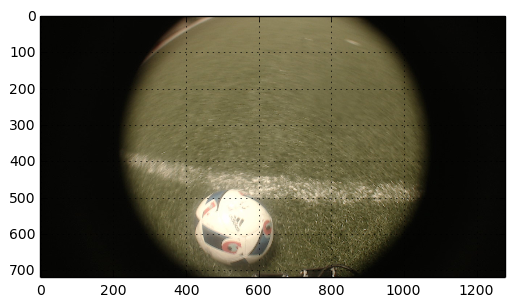

In [14]:
frame = cv2.imread("/home/vinicius/Dropbox/Projeto Mestrado/Codigos/RoboFEI-HT_Debug/AI/Vision/iPython/campo.png")
data = {
    'frame': frame,
    'pos_tilt': 0,
    'pos_pan': 0,
    'time': time.localtime()
}
imshow(data['frame'])

find(data, 0)
#end-iPython

# run
doxygen-iPython

In [15]:
#eself-iPython run
#edes-iPython def run(self):
def run( ):
    global __step; global _running #debug-iPython
    _running = True
    #des-iPython while _running:
    #ini-tab -> Iniciando while
    #des-iPython with _pausethread:
    #ini-tab -> Iniciando pausa
    #des-iPython if _running == False:
    #des-iPython      break
    if __step == 0:
        __step += 1
        frame = __green.segmentation(__observation['frame'].copy())

    if __step == 1:
        __step += 1
        if _args.localization == True:
            frame = __opening.morphologicalTransformations(frame, __observation['frame'].copy())
        else:
            frame = __opening.morphologicalTransformations(frame)
    
    if __step == 2:
        __step += 1
        if _args.localization == True:
            frame = __closing.morphologicalTransformations(frame, __observation['frame'].copy())
        else:
            frame = __closing.morphologicalTransformations(frame)

    main(frame, __observation['pos_pan'])

    if _args.localization == True:
        if cv2.waitKey(1) & 0xFF == ord('q'):
            __green.show = False
            __opening.show = False
            __closing.show = False
            _args.localization = False
            cv2.destroyAllWindows()
    #end-tab -> Finalizando Pausa
    # des-iPython time.sleep(0.1) 
    #des-iPython self._pause() #self-iPython run
    #end-tab -> Iniciando while

In [16]:
#ini-iPython

## Teste run

In [17]:
_args.localization = True
while _args.localization:
    find(data, 0)
    run()
#end-iPython

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


# finalize
doxygen-iPython

In [18]:
#eself-iPython finalize
#edes-iPython def finalize(self):
def finalize( ):
    _running = False
    #des-iPython _pausethread.notify()
    #des-iPython _pausethread.release()
    #des-iPython self.join()
    __green.finalize()
    __opening.finalize()
    __closing.finalize() #self-iPython finalize

In [19]:
#ini-iPython

## Teste finalize

In [20]:
finalize()
#end-iPython

IOError: [Errno 2] Arquivo ou diretório não encontrado: './Data/config.ini'

In [ ]:
#end-tab -> fim classe